# Detects rhmyes by linguistic featurs (Mel or Mfcc)

It takes already annotated data in order to check the precission of this Method afterwards. It searches for the best decision threshold simply by trying them all. In order to prevent "overfitting" it was analysed if the same threshold would apply to the DTA-DTR dataset and an annotated dataset of Projekt Gutenberg which was the case. 

In [2]:

import pandas as pd
import os
import numpy as np
from word_spectral import wordspectrum
from utils import check_rhyme
import tqdm.notebook
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import confusion_matrix
pd.options.mode.chained_assignment = None 

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path = 'data'
fname = 'gutenberg_rhymes.csv'#'rhymes_clean.csv'
#n_samples = 1000


rhyme_df_read = pd.read_csv(os.path.join(path, fname))

n_samples = len(rhyme_df_read)
rhyme_df = rhyme_df_read[:n_samples]

rhyme_df['mean_0'] = [99.0]*n_samples
rhyme_df['mean_1'] = [99.0] *n_samples
rhyme_df['mean_2'] = [99.0] *n_samples

rhyme_df

,word1,word2,rhyme,mean_0,mean_1,mean_2
0,goß,aufgethan,0,99.0,99.0,99.0
1,weiht,speit,1,99.0,99.0,99.0
2,trefflichkeit,pendeluhr,0,99.0,99.0,99.0
3,prangst,decken,0,99.0,99.0,99.0
4,bösen,lösen,1,99.0,99.0,99.0
...,...,...,...,...,...,...
2218,brust,wagen,0,99.0,99.0,99.0
2219,küssen,hüpft,0,99.0,99.0,99.0
2220,nicht,licht,1,99.0,99.0,99.0
2221,najaden,gestaden,1,99.0,99.0,99.0


In [4]:
for order in range (3):
    
    for idx in tqdm.notebook.tqdm(range(n_samples), total=n_samples, desc="Processing records"):
        try:
            spec_1 = wordspectrum(rhyme_df['word1'][idx])
            spec_2 = wordspectrum(rhyme_df['word2'][idx])

            mean, img = check_rhyme(spec_1,spec_2,
                                                features = 'mfccs',
                                                order=order,
                                                length = 14, 
                                                cut_off = 1,
                                                min_matches=9,
                                                pool=0)
            
            rhyme_df['mean_'+str(order)][idx] = mean *500
            #rhyme_df['length_'+str(order)][idx] = length
            #rhyme_df['idx_'+str(order)][idx] = idx_col

        except:
            print(rhyme_df['word1'][idx],rhyme_df['word2'][idx])
            
rhyme_df.dropna(subset = ['mean_0','mean_1','mean_2'], inplace=True)

In [5]:
pd.set_option('display.max_rows', 200)
rhyme_df.head(200)

,word1,word2,rhyme,mean_0,mean_1,mean_2
0,goß,aufgethan,0,9441.344155,2105.765488,154.202046
1,weiht,speit,1,2944.997311,981.459379,154.726409
2,trefflichkeit,pendeluhr,0,10433.397187,2043.644561,177.553491
3,prangst,decken,0,9564.782672,1736.150980,255.439066
4,bösen,lösen,1,2675.991694,349.761897,45.316466
5,fragen,ausgeschlagen,1,2936.970022,759.477172,79.339796
6,lustberauscht,blühn,0,10965.854221,1538.980418,163.941891
7,cytheren,hüten,0,5950.813717,1552.690771,151.710169
8,hinein,sein,1,3663.707839,827.125675,87.993219
9,todesblocke,scherz,0,10924.492253,2415.351722,224.758587


In [6]:
len(rhyme_df)

2223

In [15]:
rhyme = np.asarray(rhyme_df['rhyme'])

for order in range(3):
    mean = np.asarray(rhyme_df['mean_'+str(order)])
    min_error = n_samples
    for i in range(int(np.amin(mean)),int(np.amax(mean))):
        comp = np.absolute(rhyme - (mean < i))
        error = np.sum(comp)
        if error < min_error:
            min_error = error
            thresh = i
            
    print('order: ' + str(order))
    print('minimal error: ' + str(min_error))
    print('threshold: ' + str(thresh))


    
    
rhyme_df['pred'] = rhyme_df[['mean_'+str(0)]] < 5019    # here the threshold found with tda-tdr is used
                                                        # in order to make it a validation 
comp = np.absolute(rhyme - np.asarray(rhyme_df['pred']))


print('number of wrong predictions: ' + str(np.sum(comp)))


order: 0
minimal error: 151
threshold: 4915
order: 1
minimal error: 160
threshold: 1122
order: 2
minimal error: 271
threshold: 125
number of wrong predictions: 158


In [16]:
pd.set_option('display.max_rows', 1000)
rhyme_df.head(1000)

,word1,word2,rhyme,mean_0,mean_1,mean_2,pred
0,goß,aufgethan,0,9441.344155,2105.765488,154.202046,False
1,weiht,speit,1,2944.997311,981.459379,154.726409,True
2,trefflichkeit,pendeluhr,0,10433.397187,2043.644561,177.553491,False
3,prangst,decken,0,9564.782672,1736.150980,255.439066,False
4,bösen,lösen,1,2675.991694,349.761897,45.316466,True
5,fragen,ausgeschlagen,1,2936.970022,759.477172,79.339796,True
6,lustberauscht,blühn,0,10965.854221,1538.980418,163.941891,False
7,cytheren,hüten,0,5950.813717,1552.690771,151.710169,False
8,hinein,sein,1,3663.707839,827.125675,87.993219,True
9,todesblocke,scherz,0,10924.492253,2415.351722,224.758587,False


In [17]:
rhyme_df.loc[rhyme_df['rhyme']!=rhyme_df['pred']].head(1000)

,word1,word2,rhyme,mean_0,mean_1,mean_2,pred
24,grabeshöhle,todesriegeln,0,4463.671976,1227.727797,148.383781,True
27,redlichen,leidenden,1,6332.801051,1444.956448,173.820801,False
39,süß,paradies,1,5847.819752,1108.717634,116.722890,False
47,umher,sternenleer,1,5107.085784,1062.422494,130.389224,False
51,gelesen,durchweben,1,6575.177034,1129.648242,129.520016,False
60,floß,goß,1,5199.543238,1333.792302,140.878320,False
74,himmeln,sonnen,0,3924.146520,811.186751,91.566118,True
83,nieder,mir,0,4206.932518,1085.959633,122.209320,True
89,amorinen,bedienen,1,5587.300592,1255.890681,145.761105,False
109,phantasie,hie,1,5630.038208,1328.592274,122.678819,False


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd40f6bb080>]],
      dtype=object)

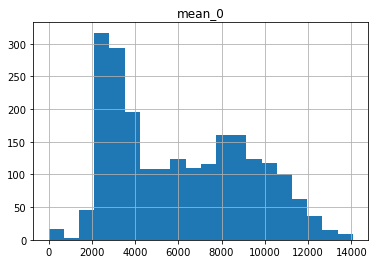

In [18]:
rhyme_df.hist('mean_0',bins=20)